# Feature Extraction

We try to identify a particular vehicle by some characteristic features, such as the grill at the front of the truck.
The **Hough transform** finds parametric shapes, such as lines and circles, in an image. E.g. the distribution, density and orientation of lines could be used to identify a vehicle.

In [1]:
import os, sys, datetime
import numpy as np
import pandas as pd
jp = os.path.join
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import math

In [3]:
DATADIR = 'data'

In [4]:
df = pd.read_excel(jp(DATADIR, 'Image Log Master File for GSU.xlsx'))
df.rename(columns=lambda x: x.replace(' ', '').replace('@', '').replace('#', '').replace('/', '_'), inplace=True)
df.index = df.Ticket
df['FN'] = [ 'data/Ticket %s/%s' % (r.Ticket, r.ImageFileName.split("'")[1]) for r in df.itertuples()]

In [ ]:
df_inpic = df[df.In_OutPic=='In Pic 2']
for r in df_inpic.iloc[50:60].itertuples():
    ##print r.In_OutPic, r.FN
    img = cv2.imread(r.FN)
    img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
    plt.figure(figsize=(20,5))
    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.title("original")
    
    # crop
    ##subimg = cv2.cvtColor(img[200:800, 200:800], cv2.cv.CV_RGB2GRAY)
    subimg = cv2.cvtColor(img[300:700, 300:700], cv2.cv.CV_RGB2GRAY)
    plt.subplot(1,4,2)
    plt.imshow(subimg, cmap='gray')
    plt.title("cropped")
    
    #edge
    plt.subplot(1,4,3)
    gimg = cv2.Canny(subimg, 50, 100, 5)
    plt.imshow(gimg, cmap='gray')
    plt.title("Edge Detection")
    
    #Hough
    plt.subplot(1,4,4)
    hgh,  = cv2.HoughLinesP(gimg, 2, math.pi/90, 20)
    dest = cv2.cvtColor(gimg, cv2.cv.CV_GRAY2BGR)
    for v in hgh:
        cv2.line(dest, (v[0], v[1]), (v[2],v[3]), (255, 0, 0) )
    plt.imshow(dest)
    plt.title("Hough Lines")
    

# Test Hough Transform
This is from the on-line documentation of OpenCV... just to see how the parametes work...

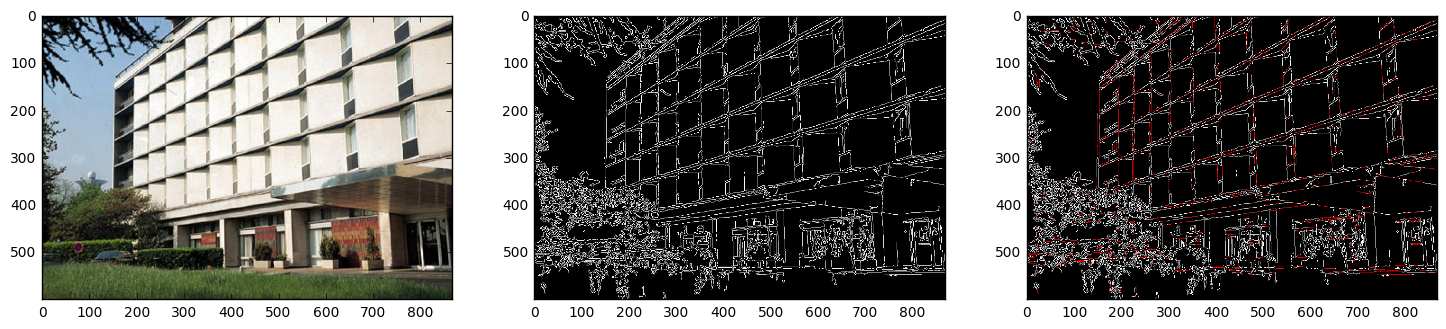

In [101]:
img = cv2.imread('building.jpg')
img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
gimg = cv2.Canny(img, 50, 200, 3)
plt.imshow(gimg, cmap='gray')
plt.subplot(1,3,3)
hgh,  = cv2.HoughLinesP(gimg, 1, math.pi/180, 80, 5, 5)
dest = cv2.cvtColor(gimg, cv2.cv.CV_GRAY2BGR)
for v in hgh:
    cv2.line(dest, (v[0], v[1]), (v[2],v[3]), (255, 0, 0) )
#    plt.plot([v[0], 600-v[1]], [v[2], 600-v[3]], "r-")
plt.imshow(dest)